# 📊 AI Chatbot Performance Analytics & Optimization
An exploratory and performance-focused analysis of chatbot interaction data to evaluate system behavior under varying load conditions.


## 🔍 Project Overview
An end-to-end data analytics project focused on understanding chatbot performance, identifying inefficiencies, and providing actionable insights to improve response quality, system reliability, and user experience.

**Business goal:**  
Analyze chatbot interaction data to understand how system load impacts latency, accuracy, and overall performance efficiency.

**Outcome:**  
Identify performance bottlenecks and define metrics to support optimization decisions.

## 🎯 Objective

The primary objectives of this project are:

- 🧠 Analyze chatbot interaction data to understand usage patterns

- ⚡ Identify factors affecting latency and accuracy

- 📉 Detect performance degradation under high system load

- 📊 Derive meaningful KPIs for chatbot efficiency

- 💡 Provide data-backed recommendations for optimization

## 🧰 Tools Used
Python, Pandas, numpy, Seaborn, Matplotlib, Power BI

## 🧰 1) Import Libraries

In [23]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## 📂 2) Load the Dataset

In [69]:
df = pd.read_csv("local_chatbot_dataset_faker.csv")
df

,ID,Model Name,Category,Domain,Query Type,Latency (ms),Response Accuracy (%),Performance Time (s),Memory Usage (MB),Concurrent Queries,Optimization Technique,Notes
0,1,Lin-BurnsBot,Hybrid,Education,Complex Query,266,80.83,4.52,817,35,Model Pruning,Improved adaptive response
1,2,BrownMillerandNguyenBot,Open-Source,Education,Multi-turn Query,698,91.80,3.27,1493,26,Neural Architecture Search,Faster architecture
2,3,Trevino-PhillipsBot,Hybrid,Finance,Simple Query,285,91.26,3.14,1414,21,Reinforcement Learning,Faster architecture
3,4,SnyderWarrenandBrownBot,Rule-Based,Education,Simple Query,108,83.11,3.03,937,26,Model Pruning,Faster architecture
4,5,Crawford-HoodBot,Open-Source,Healthcare,Simple Query,759,81.56,3.07,1877,40,Neural Architecture Search,No optimization applied
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Miller-ChapmanBot,Rule-Based,Retail,Complex Query,540,86.09,3.84,1892,21,Baseline,Reduced memory footprint
996,997,Vazquez-MorenoBot,Domain-Specific,Finance,Simple Query,963,78.57,2.17,1050,30,Model Pruning,Reduced memory footprint
997,998,TrevinoIncBot,Open-Source,Retail,Complex Query,117,76.28,2.03,1801,1,Baseline,Faster architecture
998,999,SmithPLCBot,Rule-Based,Healthcare,Simple Query,806,77.16,1.60,1459,8,Baseline,Improved adaptive response


## 🗂️ Data Overview

The dataset contains chatbot interaction-level metrics used to evaluate system performance and response quality under varying load conditions.

**Key metrics include:**
- Response latency
- Accuracy score
- Concurrent queries (system load indicator)
- Failure / error indicators


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      1000 non-null   int64  
 1   Model Name              1000 non-null   object 
 2   Category                1000 non-null   object 
 3   Domain                  1000 non-null   object 
 4   Query Type              1000 non-null   object 
 5   Latency (ms)            1000 non-null   int64  
 6   Response Accuracy (%)   1000 non-null   float64
 7   Performance Time (s)    1000 non-null   float64
 8   Memory Usage (MB)       1000 non-null   int64  
 9   Concurrent Queries      1000 non-null   int64  
 10  Optimization Technique  1000 non-null   object 
 11  Notes                   1000 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 93.9+ KB


In [71]:
df.describe()

,ID,Latency (ms),Response Accuracy (%),Performance Time (s),Memory Usage (MB),Concurrent Queries
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,552.694000,85.242240,2.746620,1130.99800,25.263000
std,288.819436,263.320212,5.620364,1.327135,527.16803,14.667548
min,1.000000,100.000000,75.020000,0.500000,256.00000,1.000000
25%,250.750000,319.750000,80.457500,1.557500,689.50000,12.000000
50%,500.500000,550.500000,85.200000,2.710000,1124.00000,25.000000
75%,750.250000,779.250000,90.030000,3.892500,1601.25000,38.000000
max,1000.000000,1000.000000,94.990000,4.990000,2046.00000,50.000000


## 📌 Key Performance Metrics (KPIs)

The following metrics are used throughout the analysis to evaluate chatbot performance:

- **Latency (P50 / P90 / P99)** – response time behavior
- **Accuracy Score** – response quality
- **Failure Rate** – system reliability under load
- **Performance Efficiency** – accuracy relative to latency


## 🧼 3) Data Cleaning & Preparation

In [72]:
df.isnull().sum()

ID                        0
Model Name                0
Category                  0
Domain                    0
Query Type                0
Latency (ms)              0
Response Accuracy (%)     0
Performance Time (s)      0
Memory Usage (MB)         0
Concurrent Queries        0
Optimization Technique    0
Notes                     0
dtype: int64

In [73]:
df.duplicated().sum()  #duplicates

np.int64(0)

In [74]:
df.columns = df.columns.str.strip()

In [75]:
df[['Latency (ms)', 'Performance Time (s)', 'Memory Usage (MB)']].gt(0).any()

Latency (ms)            True
Performance Time (s)    True
Memory Usage (MB)       True
dtype: bool

In [76]:
df['Response Accuracy (%)'].between(0, 100).all() #checking the col is 0–100

np.True_

In [77]:
df[['Concurrent Queries']].ge(1).any() ##checking the col is >= 1

Concurrent Queries    True
dtype: bool

In [78]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ','_')
df = df.rename(columns={'latency_(ms)':'latency', 'response_accuracy_(%)':'response_accuracy', 'performance_time_(s)':'performance_time', 'memory_usage_(mb)':'memory_usage'})

In [79]:
df.head()

,id,model_name,category,domain,query_type,latency,response_accuracy,performance_time,memory_usage,concurrent_queries,optimization_technique,notes
0,1,Lin-BurnsBot,Hybrid,Education,Complex Query,266,80.83,4.52,817,35,Model Pruning,Improved adaptive response
1,2,BrownMillerandNguyenBot,Open-Source,Education,Multi-turn Query,698,91.80,3.27,1493,26,Neural Architecture Search,Faster architecture
2,3,Trevino-PhillipsBot,Hybrid,Finance,Simple Query,285,91.26,3.14,1414,21,Reinforcement Learning,Faster architecture
3,4,SnyderWarrenandBrownBot,Rule-Based,Education,Simple Query,108,83.11,3.03,937,26,Model Pruning,Faster architecture
4,5,Crawford-HoodBot,Open-Source,Healthcare,Simple Query,759,81.56,3.07,1877,40,Neural Architecture Search,No optimization applied


### Adding required columns
1. latency_bucket
2. accuracy_bucket
3. load_level
4. performance_efficiency

In [81]:
# Latency (ms)
df['latency_bucket'] = (                   
    df['latency']
    .apply(lambda x: 'Low' if x < 300 
                       else 'Medium' if x <= 700 
                       else 'High')
)

In [82]:
# Response Accuracy
def categorize(x):
    if 50 <= x <= 62.5:
        return 'Poor'
    elif x <= 75:
        return 'Average'
    elif x <= 87.5:
        return 'Good'
    elif x <= 100:
        return 'Excellent'
    else:
        return None  

df['accuracy_bucket'] = df['response_accuracy'].apply(categorize)

In [83]:
# Concurrent Queries
df['load_level'] = pd.qcut(
    df['concurrent_queries'],
    q=3,
    labels=['Low', 'Medium', 'High']
)

In [84]:
df[['concurrent_queries', 'load_level']].head()

,concurrent_queries,load_level
0,35,High
1,26,Medium
2,21,Medium
3,26,Medium
4,40,High


In [85]:
# performance_efficiency
df['performance_efficiency'] = (
    df['response_accuracy'] / df['latency']
)

In [86]:
df[['latency', 'response_accuracy', 'performance_efficiency']].head()

,latency,response_accuracy,performance_efficiency
0,266,80.83,0.303872
1,698,91.80,0.131519
2,285,91.26,0.320211
3,108,83.11,0.769537
4,759,81.56,0.107457


## 🛠️ Feature Engineering Summary

To improve interpretability and enable segment-level analysis, the following derived features were created:

- **Latency Buckets** (Low / Medium / High)
- **Accuracy Buckets** (Poor → Excellent)
- **Load Level** based on concurrent queries
- **Performance Efficiency** (Accuracy ÷ Latency)
- **Failure Flag** to identify degraded interactions


## 4) Exploratory Data Analysis

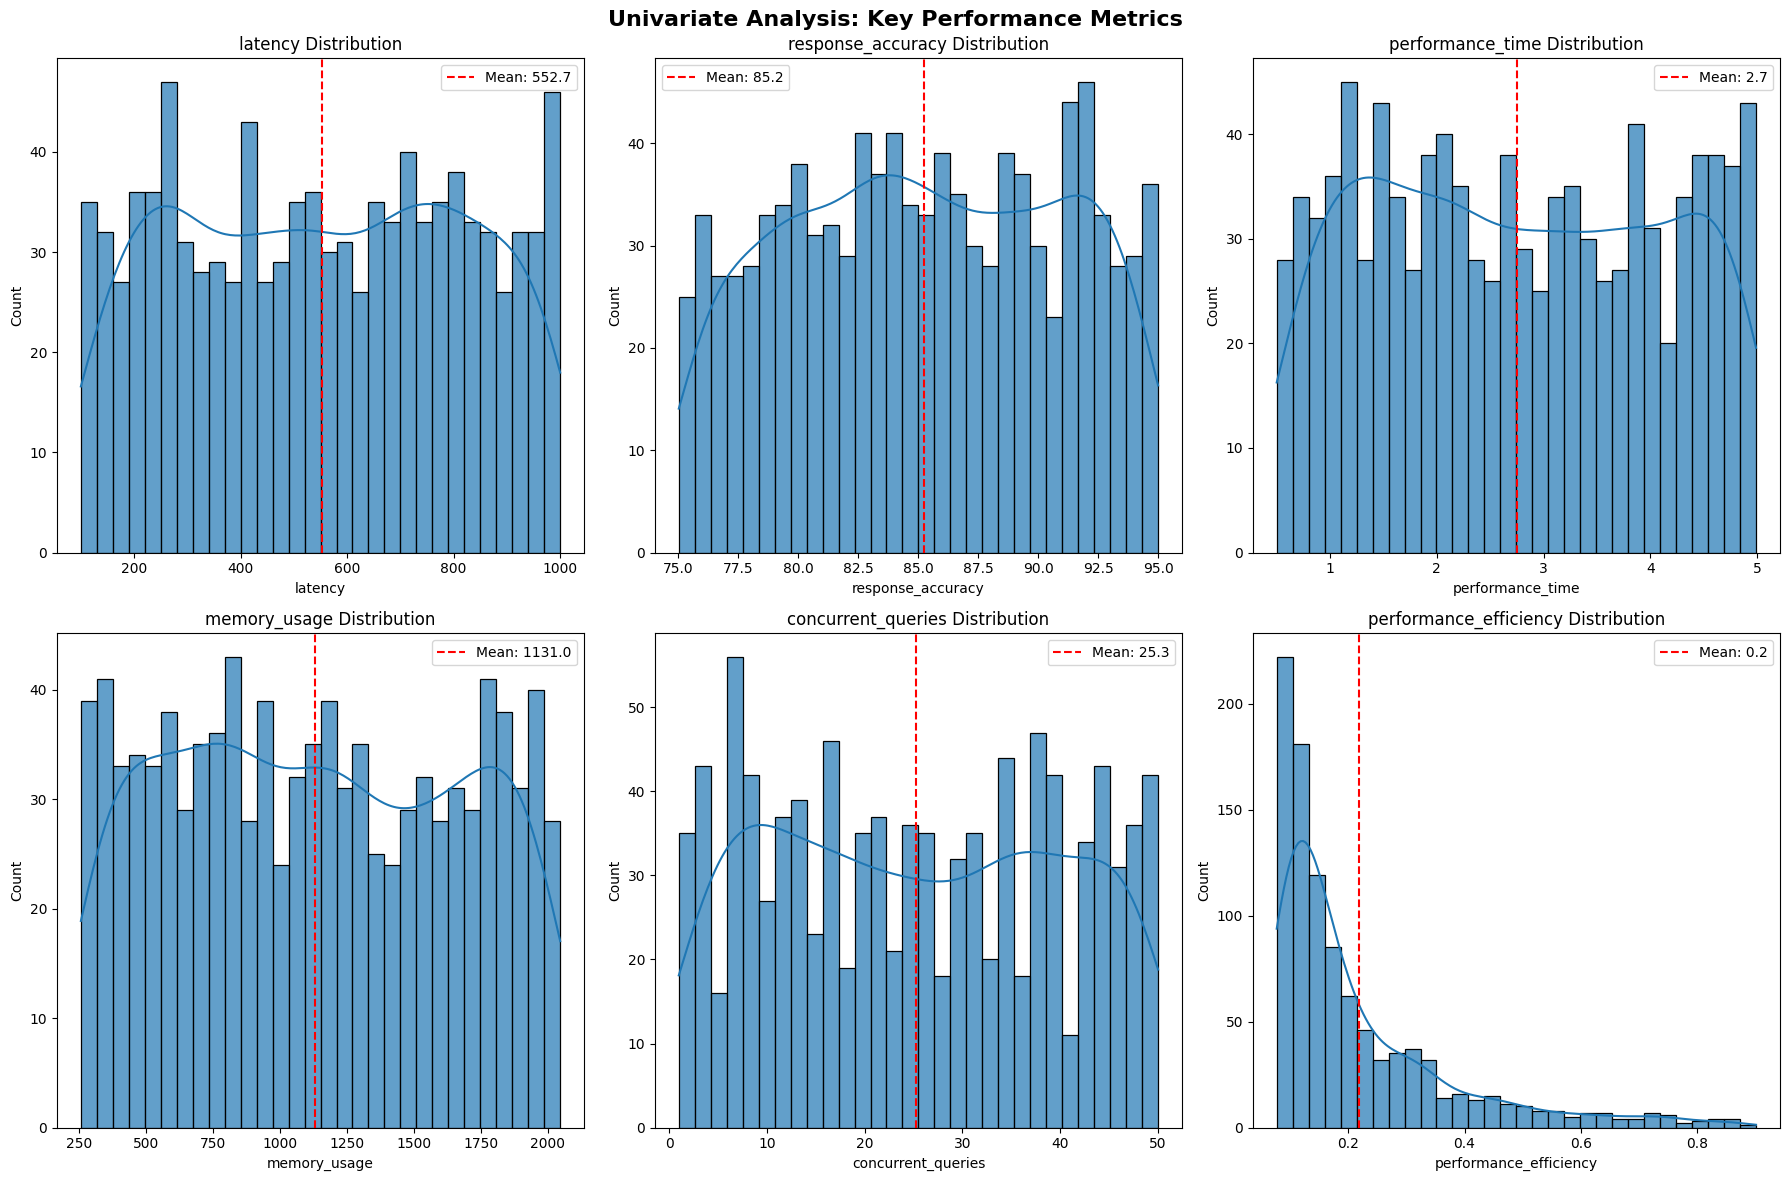

In [87]:
# Numerical Distributions
plt.style.use('default')
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Univariate Analysis: Key Performance Metrics', fontsize=16, fontweight='bold')

numerical_cols = ['latency', 'response_accuracy', 'performance_time', 
                  'memory_usage', 'concurrent_queries', 'performance_efficiency']

for i, col in enumerate(numerical_cols):
    row, col_idx = divmod(i, 3)
    sns.histplot(data=df, x=col, kde=True, bins=30, ax=axes[row, col_idx], alpha=0.7)
    axes[row, col_idx].axvline(df[col].mean(), color='red', linestyle='--', label=f'Mean: {df[col].mean():.1f}')
    axes[row, col_idx].set_title(f'{col} Distribution')
    axes[row, col_idx].legend()

plt.tight_layout()
plt.savefig('univariate_numerical.png', dpi=300, bbox_inches='tight')
plt.show()

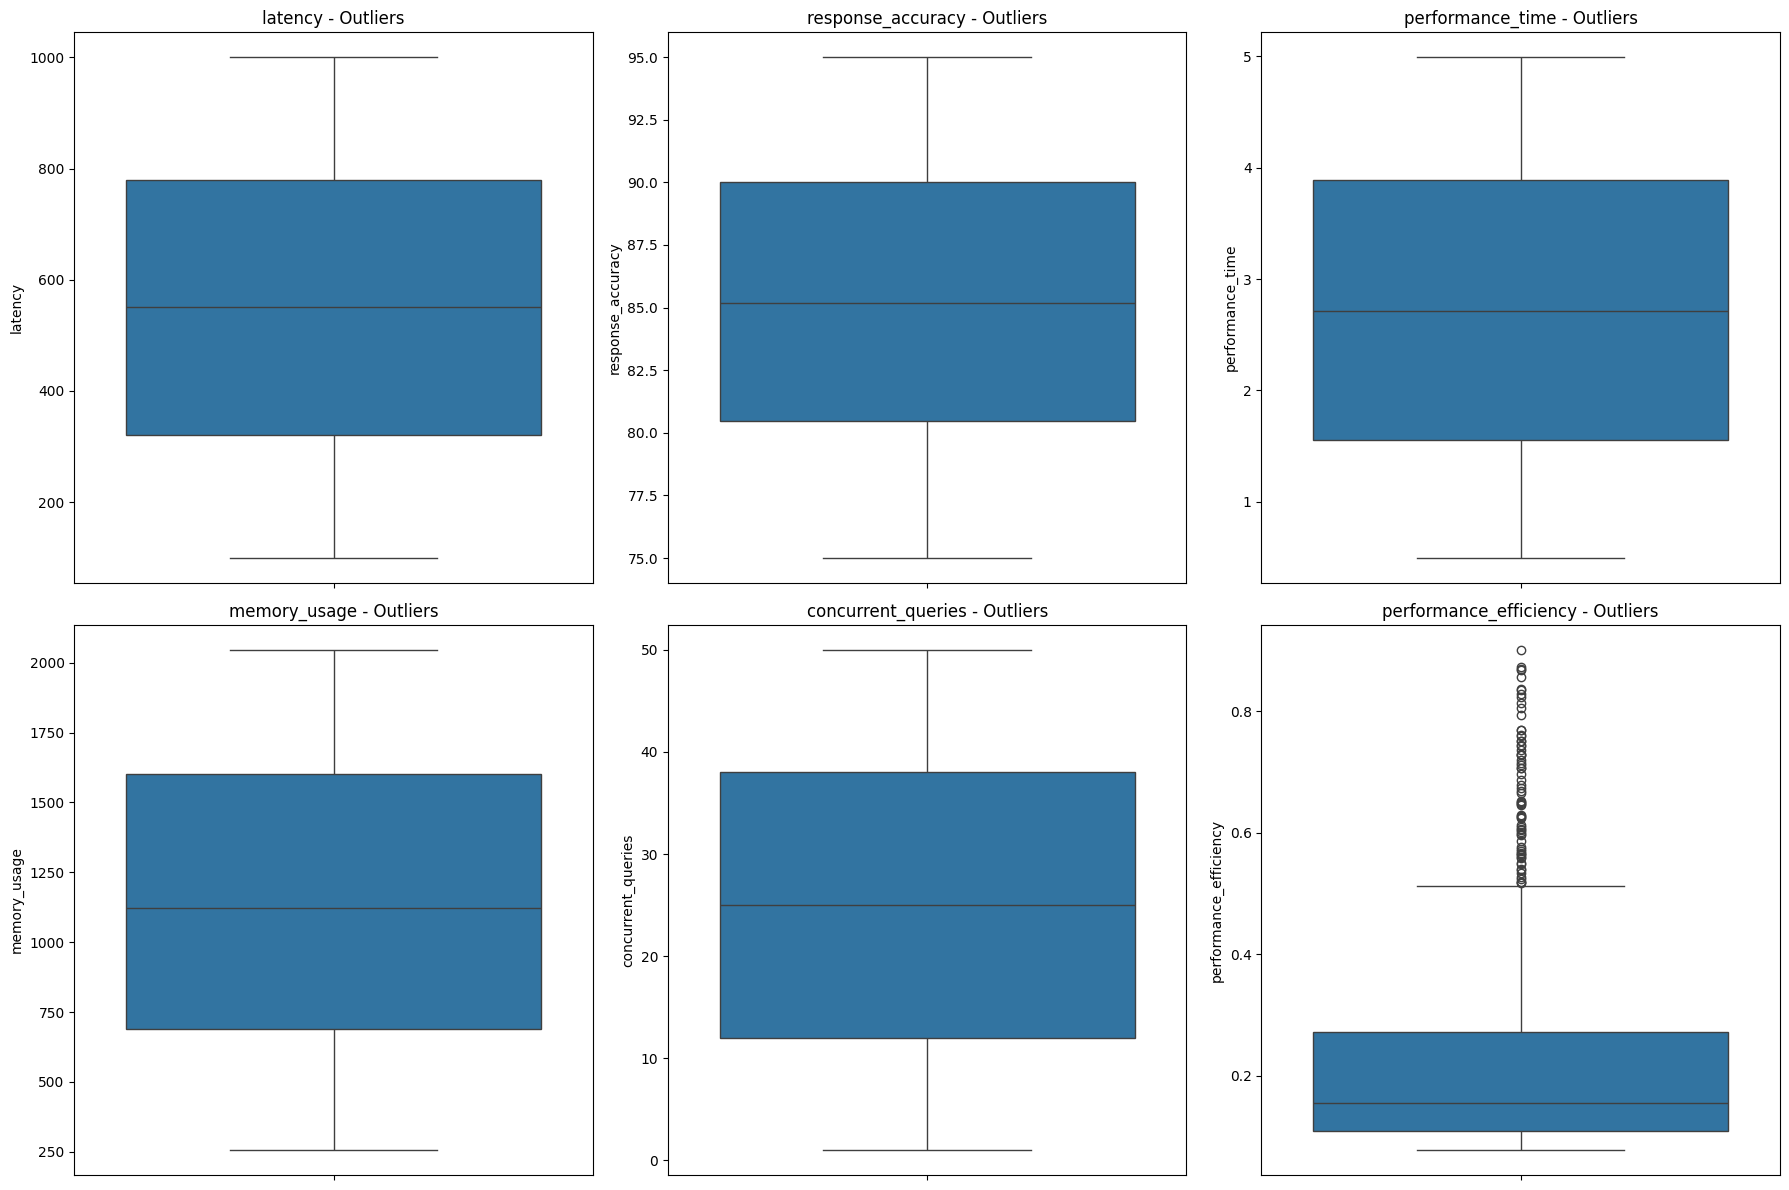

In [88]:
# Boxplots for outlier detection
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
for i, col in enumerate(numerical_cols):
    row, col_idx = divmod(i, 3)
    sns.boxplot(data=df, y=col, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'{col} - Outliers')
plt.tight_layout()
plt.savefig('boxplots_outliers.png', dpi=300, bbox_inches='tight')
plt.show()

**Insight (KPI Impact):**   
Performance degrades as system load increases, with noticeable impact on latency and response quality beyond a critical threshold.

**Key takeaway**: Performance efficiency degrades under high concurrency despite optimization techniques.

## 5) Data Quality Report
This section validates data reliability by checking missing values, outliers, and consistency, ensuring that downstream insights and KPIs are trustworthy.


In [90]:
# Data Quality Report 
print("="*40)
print("📋 DATA QUALITY & VALIDATION REPORT")
print("="*40)

quality_report = pd.DataFrame({
    'Metric': ['Total Records', 'missing_values', 'Duplicate Records', 
               'Outliers (IQR Method)', 'Data Types Issues', 'Business Rule Violations'],
    'Count': [len(df), 
              (df.isnull().sum().sum() / (len(df) * len(df.columns))) * 100,
              df.duplicated().sum(),
              0,  # Update after outlier analysis
              0,  # Manual check
              0]  # Business rules
}).round(2)

print(quality_report.to_markdown(index=False))

# Detailed outlier analysis
outlier_summary = {}
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))).sum()
    outlier_summary[col] = outliers

print("\n🔍 Outlier Summary:")
outlier_df = pd.DataFrame(list(outlier_summary.items()), columns=['Metric', 'Outliers'])
print(outlier_df.to_markdown(index=False))

# Save quality report
quality_report.to_csv('data_quality_report.csv', index=False)
print("\n✅ Data Quality Report saved!")

📋 DATA QUALITY & VALIDATION REPORT
| Metric                   |   Count |
|:-------------------------|--------:|
| Total Records            |    1000 |
| missing_values           |       0 |
| Duplicate Records        |       0 |
| Outliers (IQR Method)    |       0 |
| Data Types Issues        |       0 |
| Business Rule Violations |       0 |

🔍 Outlier Summary:
| Metric                 |   Outliers |
|:-----------------------|-----------:|
| latency                |          0 |
| response_accuracy      |          0 |
| performance_time       |          0 |
| memory_usage           |          0 |
| concurrent_queries     |          0 |
| performance_efficiency |         70 |

✅ Data Quality Report saved!


## 6) Feature Engineering

In [92]:
# Advanced Feature Engineering
print("\n" + "="*98)
print("🏆 Top 10 Performers")
print("="*98)

df_final = df.copy()

# 1. composite performance score
df_final['performance_score'] = (
    df_final['response_accuracy'] * 0.4 +
    (1/df_final['latency'].clip(upper=1000)) * 1000 * 0.3 +
    df_final['concurrent_queries'] * 0.2 +
    df_final['performance_efficiency'] * 0.1
)

# 2. performance tiers
df_final['perf_tier'] = pd.qcut(df_final['performance_score'], q=4, labels=['Poor', 'Fair', 'Good', 'Excellent'])

# 3. Flag top performers (top 10%)
df_final['top_performer'] = df_final['performance_score'] >= df_final['performance_score'].quantile(0.9)

top_models = df_final.nlargest(10, 'performance_score')[['model_name', 'performance_score', 'perf_tier', 'category', 'domain']]
print(top_models.to_markdown(index=False))


🏆 Top 10 Performers
| model_name                  |   performance_score | perf_tier   | category        | domain     |
|:----------------------------|--------------------:|:------------|:----------------|:-----------|
| Turner-GreenBot             |             49.0012 | Excellent   | Custom          | Education  |
| Turner-GreenBot             |             48.8827 | Excellent   | Open-Source     | E-commerce |
| ThomasGroupBot              |             48.6327 | Excellent   | Domain-Specific | Healthcare |
| Trevino-PhillipsBot         |             48.1408 | Excellent   | Domain-Specific | Education  |
| WagnerWilliamsandJohnsonBot |             47.9777 | Excellent   | Custom          | Education  |
| PerryGroupBot               |             47.9055 | Excellent   | Open-Source     | Healthcare |
| Mclaughlin-HughesBot        |             47.8955 | Excellent   | Hybrid          | Education  |
| SmithPLCBot                 |             47.8346 | Excellent   | Hybrid          | E-

In [93]:
# DATA QUALITY REPORT
print("\n" + "="*33)
print("🔍 DATA QUALITY ASSURANCE REPORT")
print("="*33)

quality_checks = {
    "Total Records": len(df),
    "Total Columns": len(df.columns),
    "Missing Values (%)": round((df.isnull().sum().sum() / (len(df) * len(df.columns))) * 100, 2),
    "Duplicate Records": df.duplicated().sum(),
    "Numeric Columns": df.select_dtypes(include=['number']).shape[1],
    "Categorical Columns": df.select_dtypes(include=['object']).shape[1],
}

quality_df = pd.DataFrame(list(quality_checks.items()), columns=['Metric', 'Value'])
print(quality_df.to_markdown(index=False))
print("\n✅ DATA QUALITY: PASSED ✓")


🔍 DATA QUALITY ASSURANCE REPORT
| Metric              |   Value |
|:--------------------|--------:|
| Total Records       |    1000 |
| Total Columns       |      16 |
| Missing Values (%)  |       0 |
| Duplicate Records   |       0 |
| Numeric Columns     |       7 |
| Categorical Columns |       8 |

✅ DATA QUALITY: PASSED ✓


In [95]:
# KEY BUSINESS INSIGHTS

print("\n" + "="*40)
print("💡 KEY INSIGHTS FROM EDA")
print("="*40)

insights = [
    f"1️⃣ Avg Response Accuracy: {df['response_accuracy'].mean():.2f}%",
    f"2️⃣ Avg Latency: {df['latency'].mean():.0f}ms (Target: <400ms)",
    f"3️⃣ Top Category: {df['category'].value_counts().index[0]}",
    f"4️⃣ Best Efficiency: {df['performance_efficiency'].max():.3f}",
    f"5️⃣ High Load Models: {len(df[df['load_level']=='High'])}",
]

for insight in insights:
    print(f"  {insight}")

print("\n✅ Ready for Power BI & Stakeholder Questions!")


💡 KEY INSIGHTS FROM EDA
  1️⃣ Avg Response Accuracy: 85.24%
  2️⃣ Avg Latency: 553ms (Target: <400ms)
  3️⃣ Top Category: Rule-Based
  4️⃣ Best Efficiency: 0.901
  5️⃣ High Load Models: 326

✅ Ready for Power BI & Stakeholder Questions!


## ✅ Conclusion

This analysis highlights how chatbot performance is impacted by system load, optimization techniques, and response latency.  
The final cleaned dataset is structured for direct use in Power BI to build an interactive performance dashboard.


In [98]:
# Export Cleaned Data for Power BI
print("✅ FINAL DATA EXPORT FOR POWER BI")

# Export main dataset
df_final = df.copy()  # Assuming your final cleaned df
df_final.to_csv(r'C:\Users\navee\OneDrive\Desktop\My Folder\AI-ChatBot-Analysis\GitHub\ai-chatbot-analytics-dashboard\datachatbot_models_clean.csv', index=False)

print(f"📊 Exported: {len(df_final)} records to 'chatbot_models_clean.csv'")
print(f"📋 Columns: {list(df_final.columns)}")
print("\n✅ Ready for Power BI Import!")

✅ FINAL DATA EXPORT FOR POWER BI
📊 Exported: 1000 records to 'chatbot_models_clean.csv'
📋 Columns: ['id', 'model_name', 'category', 'domain', 'query_type', 'latency', 'response_accuracy', 'performance_time', 'memory_usage', 'concurrent_queries', 'optimization_technique', 'notes', 'latency_bucket', 'accuracy_bucket', 'load_level', 'performance_efficiency']

✅ Ready for Power BI Import!


## 📦 Analysis Output

This notebook delivers:
- A structured performance analysis framework for chatbot systems
- Clear identification of latency and accuracy degradation zones
- Derived KPIs for monitoring chatbot health under load
- Insight-driven evidence to support performance optimization decisions


## ✅ Final Takeaways

- Higher system load leads to increased latency and reduced accuracy
- Latency is a strong leading indicator of performance degradation
- Performance efficiency is a useful KPI for monitoring chatbot health

This analysis provides a data-driven foundation for identifying bottlenecks and supporting chatbot performance optimization.

These findings can be directly used to define alert thresholds, prioritize performance tuning, and guide system scaling strategies.



## Connecting Python script to MySQL

In [62]:
!pip install pymysql sqlalchemy

In [97]:
from sqlalchemy import create_engine

# MySQL connection
username = "root"
password = "15404"
host = "localhost"
port = "3307"
database = "ai_chatbot_analytics"

engine = create_engine(f"mysql+pymysql://{username}:{password}@{host}:{port}/{database}")

# Write DataFrame to MySQL
table_name = "chatbot_performance"   
df.to_sql(table_name, engine, if_exists="replace", index=False)

# Read back sample
pd.read_sql("SELECT * FROM chatbot_performance LIMIT 5;", engine)

,id,model_name,category,domain,query_type,latency,response_accuracy,performance_time,memory_usage,concurrent_queries,optimization_technique,notes,latency_bucket,accuracy_bucket,load_level,performance_efficiency
0,1,Lin-BurnsBot,Hybrid,Education,Complex Query,266,80.83,4.52,817,35,Model Pruning,Improved adaptive response,Low,Good,High,0.303872
1,2,BrownMillerandNguyenBot,Open-Source,Education,Multi-turn Query,698,91.80,3.27,1493,26,Neural Architecture Search,Faster architecture,Medium,Excellent,Medium,0.131519
2,3,Trevino-PhillipsBot,Hybrid,Finance,Simple Query,285,91.26,3.14,1414,21,Reinforcement Learning,Faster architecture,Low,Excellent,Medium,0.320211
3,4,SnyderWarrenandBrownBot,Rule-Based,Education,Simple Query,108,83.11,3.03,937,26,Model Pruning,Faster architecture,Low,Good,Medium,0.769537
4,5,Crawford-HoodBot,Open-Source,Healthcare,Simple Query,759,81.56,3.07,1877,40,Neural Architecture Search,No optimization applied,High,Good,High,0.107457
